## Perform Camera Calibration
To study and implement camera calibration techniques in order to estimate the internal and external parameters of a camera and correct image distortions for accurate measurement and 3D reconstruction.

In [6]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [7]:
# 1. Define chessboard dimensions (inner corners)
chessboard_size = (9, 6)
square_size = 1.0

# 2. Prepare object points
objp = np.zeros((chessboard_size[0]*chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)
objp *= square_size

objpoints = []  # 3D points
imgpoints = []  # 2D points

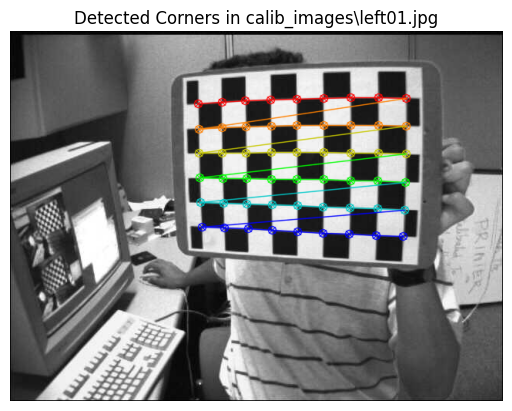

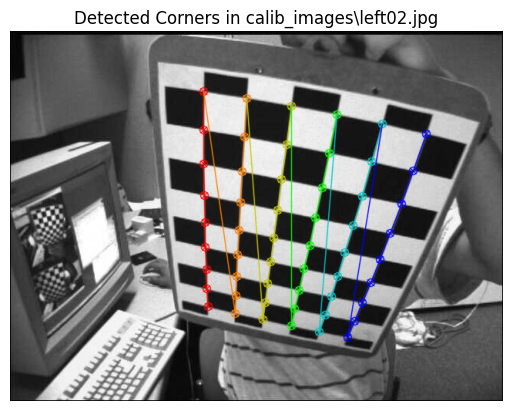

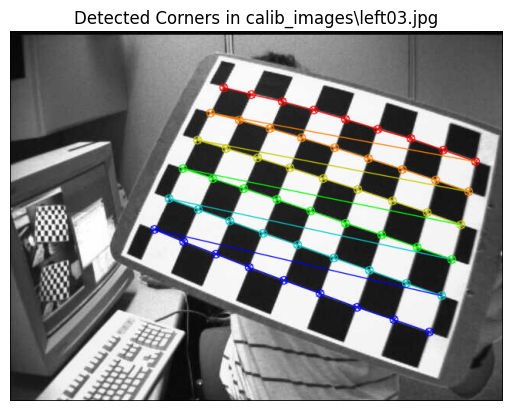

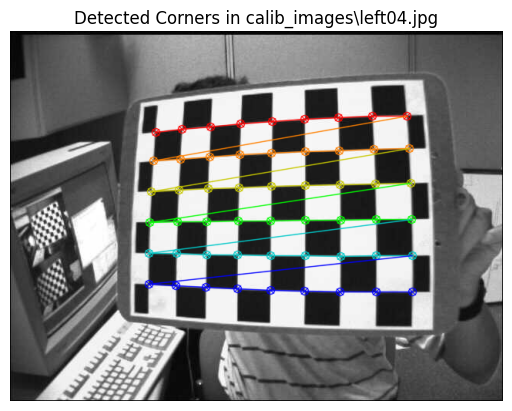

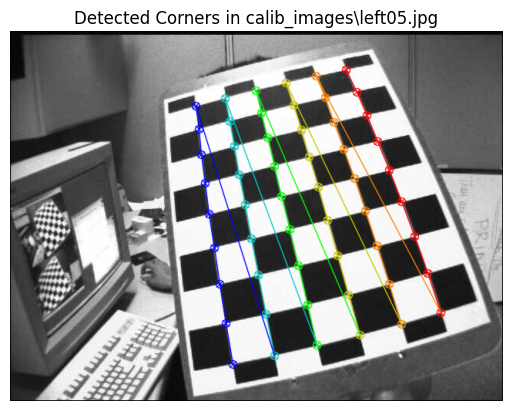

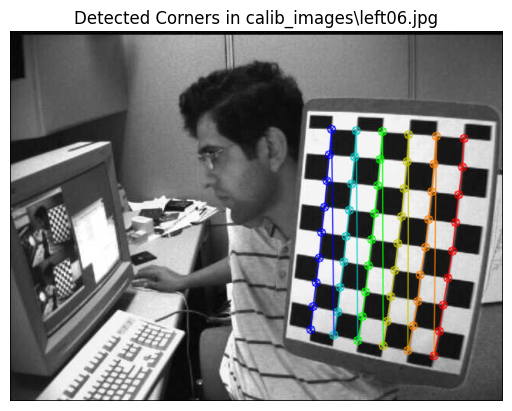

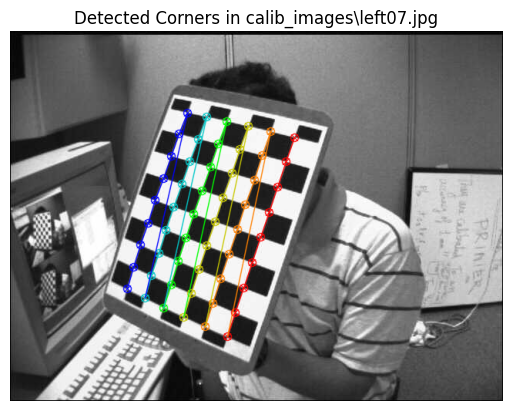

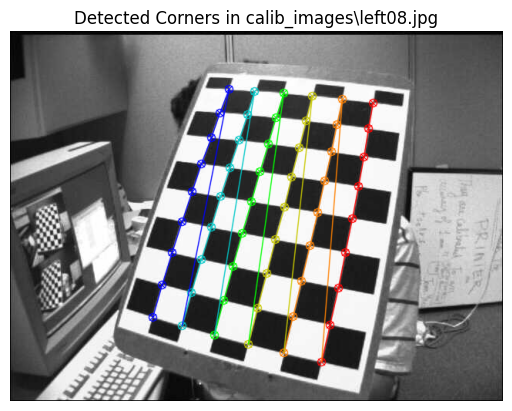

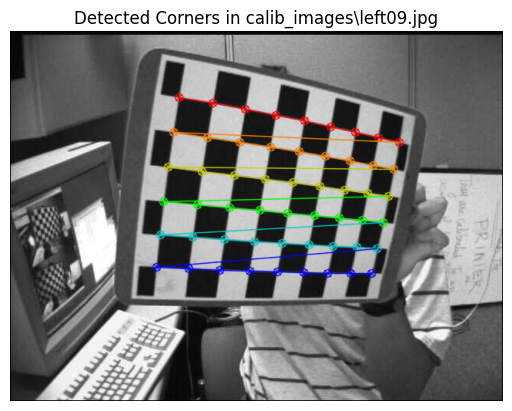

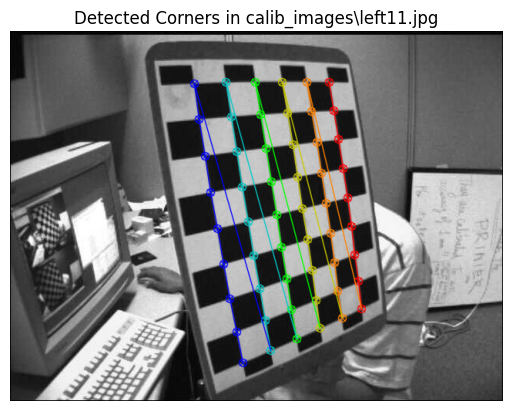

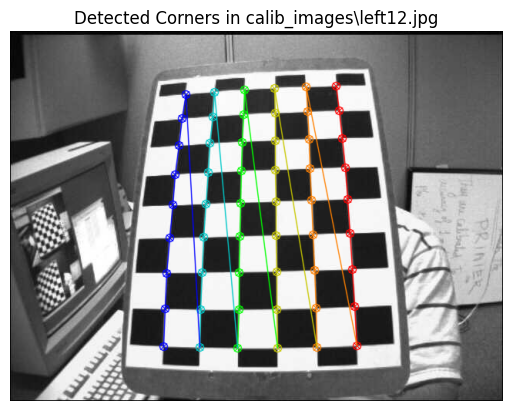

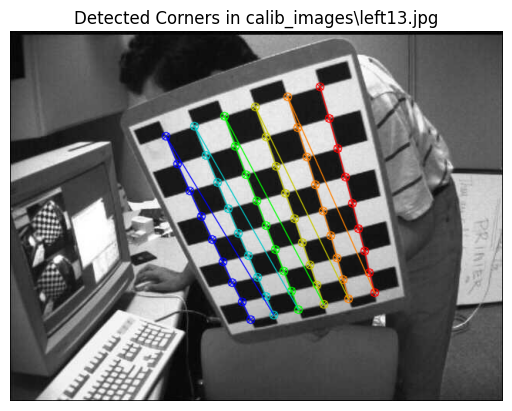

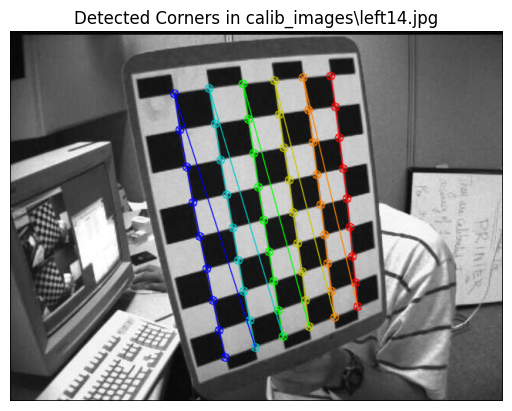

In [8]:
# 3. Load calibration images
images = glob.glob('calib_images/*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if 'img_shape' not in locals():
        img_shape = gray.shape[::-1]

    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img, chessboard_size, corners, ret)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Detected Corners in {fname}")
        plt.axis('off')
        plt.show()

In [9]:
if len(objpoints) > 0 and len(imgpoints) > 0:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_shape, None, None)
    print("Camera Matrix:\n", mtx)
    print("\nDistortion Coefficients:\n", dist)
else:
    print("No valid chessboard corners were detected in any image.")

Camera Matrix:
 [[532.35423658   0.         342.42264659]
 [  0.         532.53995406 235.04228201]
 [  0.           0.           1.        ]]

Distortion Coefficients:
 [[-2.73462172e-01 -3.85288349e-02  1.12629584e-03 -1.75411180e-04
   2.85170396e-01]]
